In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gudhi as gd
import calendar
import tadasets
import ripser
import persim
import matplotlib.style as style


import gtda
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters 


sns.set_theme(style="darkgrid")
#style.use('fivethirtyeight')

In [3]:
df1 = pd.read_csv("[Datos]\SOI.csv")
df2 = pd.read_csv("[Datos]\SOI_OLR.csv")
df3 = pd.read_csv("[Datos]\Full.csv")


<Axes: ylabel='SOI'>

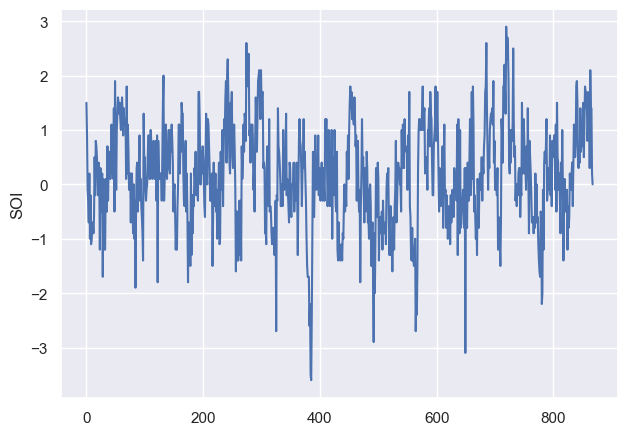

In [67]:
SOI = pd.Series(df1["SOI"])
sns.lineplot(SOI)

<Axes: ylabel='OLR'>

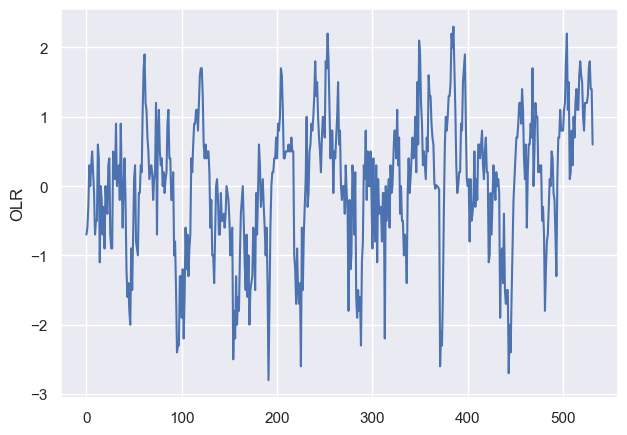

In [68]:
OLR = pd.Series(df2["OLR"])
sns.lineplot(OLR)

In [19]:
df3["Date"] = pd.to_datetime(df3["Date"])
df3["month"] = df3['Date'].map(lambda x: x.month)
df3["year"] = df3['Date'].map(lambda x: x.year)
df3['month'] = df3['month'].apply(lambda x: calendar.month_abbr[x])

<Axes: xlabel='Date', ylabel='Nino3.4'>

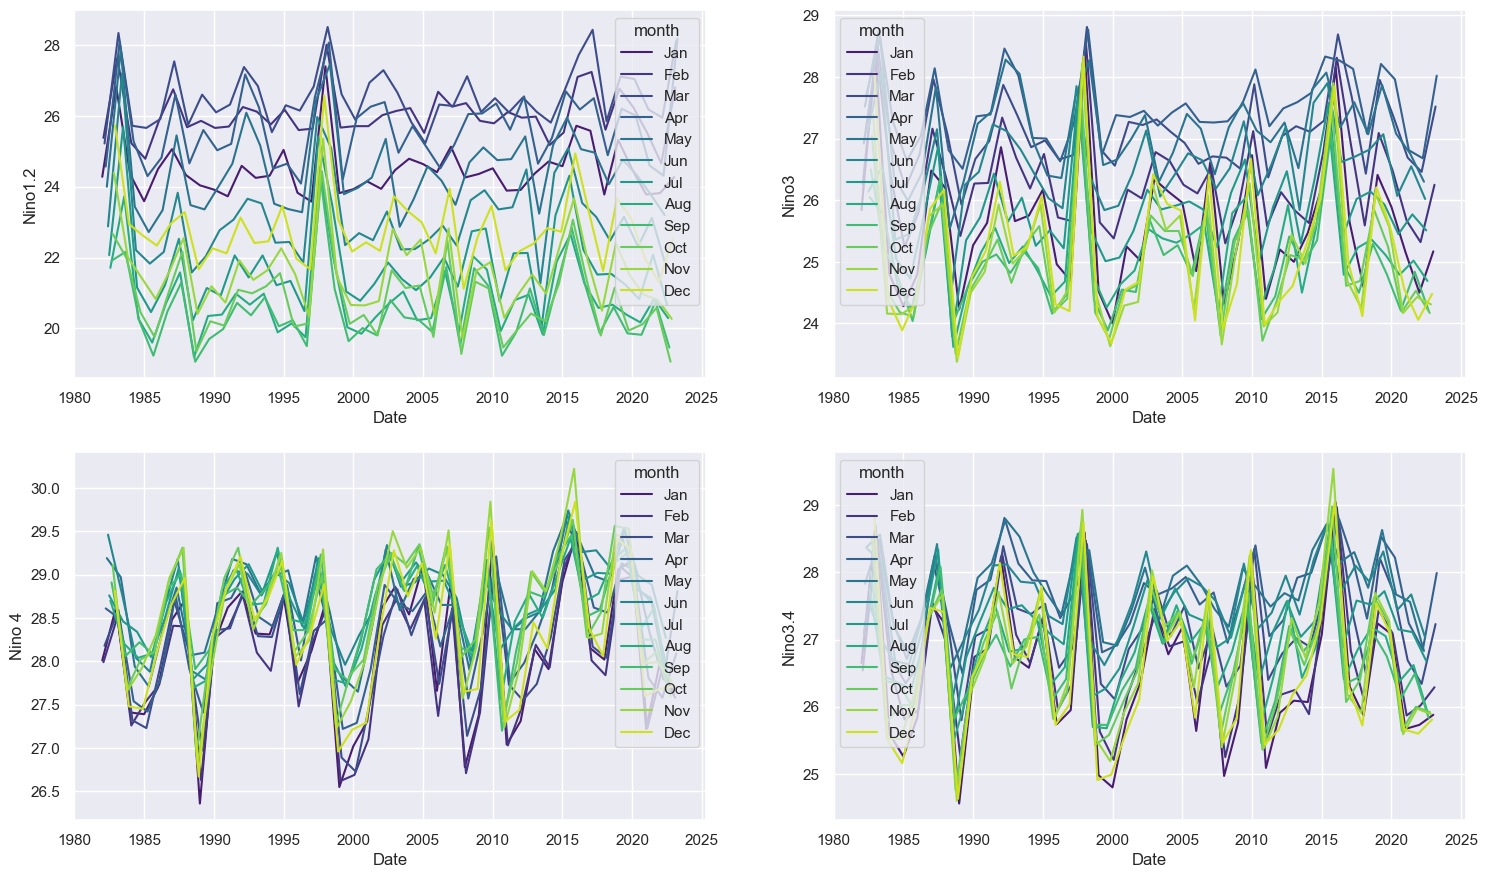

In [69]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

sns.lineplot(ax = ax[0,0], data = df3, x="Date", y="Nino1.2", hue="month", palette="viridis")

sns.lineplot(ax = ax[0,1], data = df3, x="Date", y="Nino3", hue="month", palette="viridis")

sns.lineplot(ax = ax[1,0], data = df3, x="Date", y="Nino 4", hue="month", palette="viridis")

sns.lineplot(ax = ax[1,1], data = df3, x="Date", y="Nino3.4", hue="month", palette="viridis")


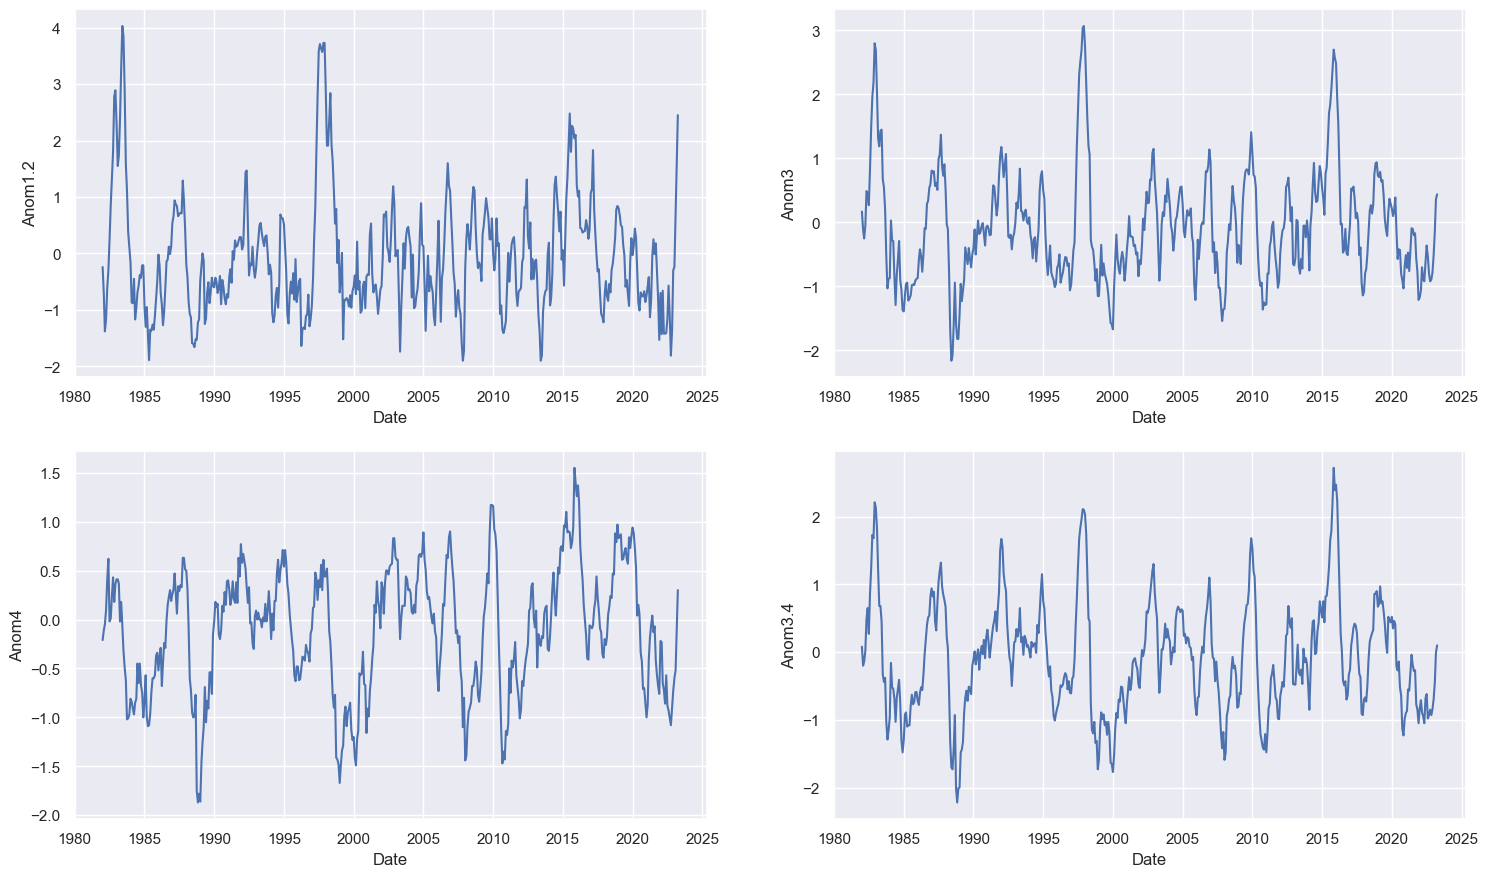

In [72]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

a = sns.lineplot(ax = ax[0,0], data = df3, x="Date", y="Anom1.2")

b = sns.lineplot(ax = ax[0,1], data = df3, x="Date", y="Anom3")

c = sns.lineplot(ax = ax[1,0], data = df3, x="Date", y="Anom4")

d = sns.lineplot(ax = ax[1,1], data = df3, x="Date", y="Anom3.4")
